In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from PIL import Image, ImageOps
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random

In [3]:
def process_folder(dirpath, samp=100):
    dirpath = dirpath.joinpath('Bmp')
    x_data = []
    y_data = []
    for it in dirpath.iterdir():
        if not it.is_dir():
            continue
        y_label = int(it.stem[-3:]) - 1
        # print(y_label)
        # print(len(os.listdir(it)))
        lst = random.choices(list(it.iterdir()), k=samp)
        for it2 in lst:
            img = Image.open(it2)
            img = ImageOps.grayscale(img)
            img = img.resize((32, 32))
            arr = np.asarray(img) / 255.0
            arr = arr.reshape((32 * 32))
            y_d = np.zeros((62,))
            y_d[y_label] = 1
            y_data.append(y_d.copy())
            x_data.append(arr.copy())
    return  np.array(x_data),  np.array(y_data)

In [4]:
dirpath = pathlib.Path.cwd().joinpath('data/c74k/GoodImg/')
x_train, y_train = process_folder(dirpath)

dirpath = pathlib.Path.cwd().joinpath('data/c74k/BadImag/')
x_train_2, y_train_2 = process_folder(dirpath, samp=20)

x_train, y_train = np.concatenate((x_train, x_train_2)), np.concatenate((y_train, y_train_2))

dirpath = pathlib.Path.cwd().joinpath('data/c74k/BadImag/')
x_test, y_test = process_folder(dirpath, samp=20)

In [5]:
x_train.shape

(7440, 1024)

In [6]:
x_train[0]

array([0.30196078, 0.30196078, 0.31372549, ..., 0.30980392, 0.30980392,
       0.30588235])

In [7]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

In [8]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [13]:
image = Image.fromarray(x_train[0].reshape((32, 32)) * 255.0)
image = image.convert('L')

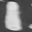

In [14]:
image

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(62, activation="softmax"))

In [38]:
model.build((None, 1024))

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_10 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 dense_32 (Dense)            (None, 512)               524800    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               262656    
                                                      

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, validation_data=(x_val, y_val), epochs=1000)

Epoch 1/1000
59/59 [==============================] - 1s 15ms/step - loss: 2.8209 - accuracy: 0.1911 - val_loss: 3.2587 - val_accuracy: 0.1435
Epoch 2/1000
59/59 [==============================] - 1s 14ms/step - loss: 2.7533 - accuracy: 0.1918 - val_loss: 3.1948 - val_accuracy: 0.1661
Epoch 3/1000
59/59 [==============================] - 1s 14ms/step - loss: 2.7122 - accuracy: 0.2164 - val_loss: 3.1619 - val_accuracy: 0.1484
Epoch 4/1000
59/59 [==============================] - 1s 14ms/step - loss: 2.6871 - accuracy: 0.2200 - val_loss: 3.1695 - val_accuracy: 0.1694
Epoch 5/1000
59/59 [==============================] - 1s 14ms/step - loss: 2.6640 - accuracy: 0.2331 - val_loss: 3.0957 - val_accuracy: 0.1806
Epoch 6/1000
59/59 [==============================] - 1s 14ms/step - loss: 2.5950 - accuracy: 0.2495 - val_loss: 3.1219 - val_accuracy: 0.2000
Epoch 7/1000
59/59 [==============================] - 1s 14ms/step - loss: 2.5357 - accuracy: 0.2593 - val_loss: 2.9969 - val_accuracy: 0.1935

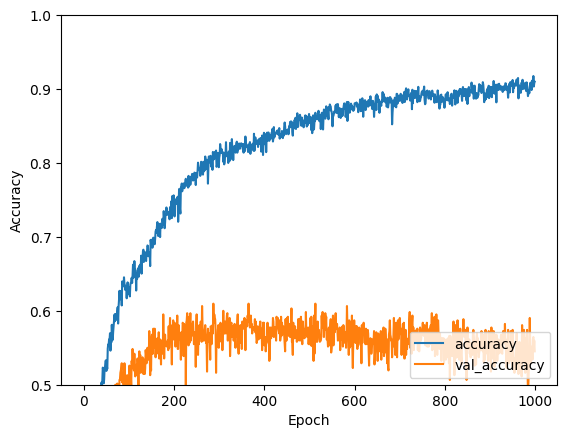

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [43]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

20/20 - 0s - loss: 2.2401 - accuracy: 0.5742 - 86ms/epoch - 4ms/step


In [44]:
test_acc, test_loss

(0.57419353723526, 2.240064859390259)

In [45]:
len(x_train)

7440

In [46]:
len(x_val)

620